# install dependencies

In [1]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [2]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.1,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 16.3294626863246890, performing 51.4 it/sec
Step 100: Loss = 1.7507048170463737, performing 234.5 it/sec
Step 200: Loss = 0.0332386056810493, performing 217.5 it/sec
No improvement since Step 249, early stopping.
[Best]  Step 248: Loss = 0.0021944894275993
[Final] Step 298: Loss = 0.0195170116144406

predicted end states
------------------------------------
         5th       Mean      95th
MDLF-1  1.33e-01  1.33e-01  1.33e-01
MDLF-2  9.97e-06  9.97e-06  9.97e-06
MDLF-3  1.01e-09  1.01e-09  1.01e-09
MDLF-4  1.01e-13  1.01e-13  1.01e-13
MDLF-5  9.77e-12  9.77e-12  9.77e-12
MDLF-6  9.64e-14  9.64e-14  9.64e-14
MDLF-7  9.97e-12  9.97e-12  9.97e-12
MDLF-8  9.85e-14  9.85e-14  9.85e-14


predicted conditional events
----------------------------------------
             5th       Mean      95th
MDLF        1.00e+00  1.00e+00  1.00e+00
NP

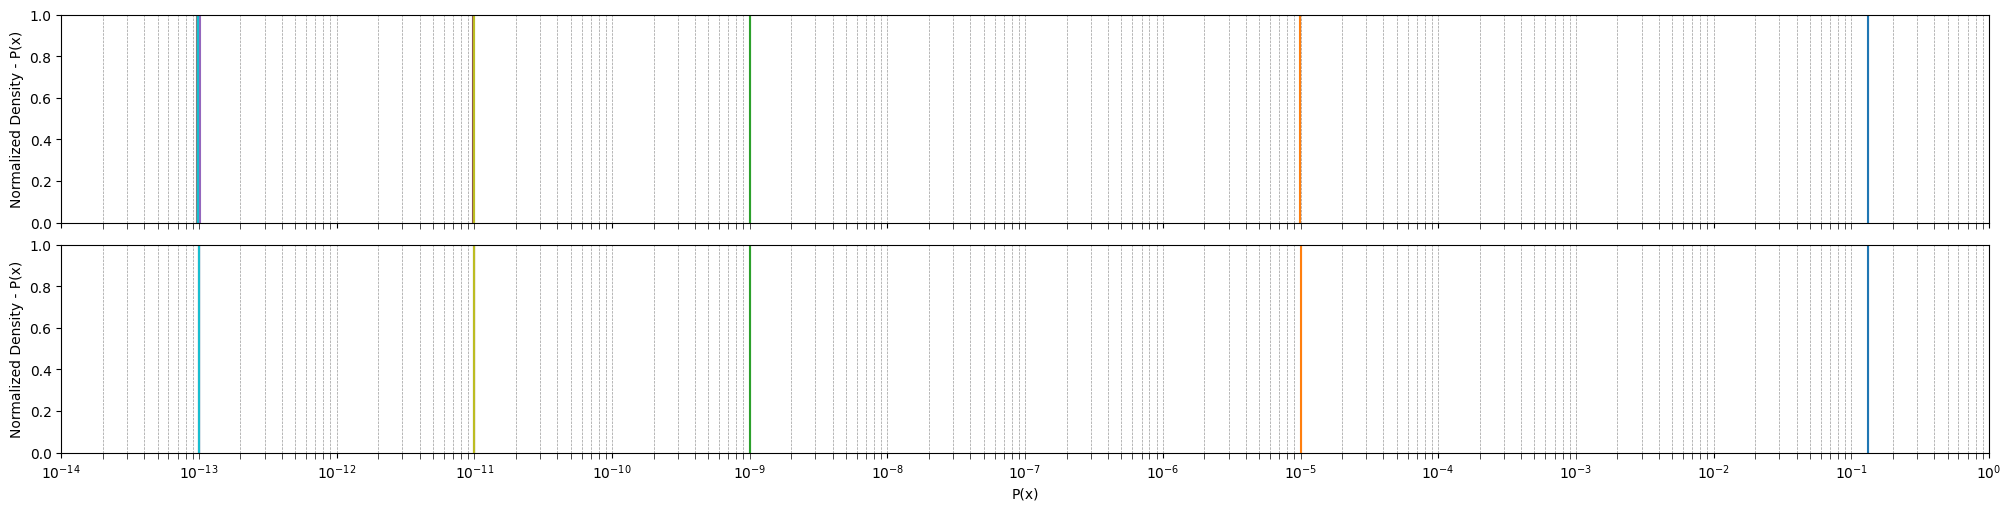

In [3]:
tunable = {
 'num_samples': 100,      # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 1.33e-1,  # set the initiating event (IE) frequency here
 'freeze_initiating_event': True,       # set to False if you'd like to predict the IE frequency as well
}

conditional_events = {
    'names': ['MDLF', 'NPPD', 'SLPD', 'DETP', 'SHTS', 'NSSP|~SHTS','NSSP|SHTS', 'NSSP|DETP'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    'MDLF-1': {
        'sequence': [1, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 1.33e-1,
    },
    'MDLF-2': {
        'sequence': [1, 1, 0, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 1.00e-5,
    },
    'MDLF-3': {
        'sequence': [1, 1, 1, 0, 0 ,0, np.nan, np.nan],
        'probability': 1e-9,
      },
    'MDLF-4': {
        'sequence': [1, 1, 1, 0, 0, 1, np.nan, np.nan],
        'probability': 1e-13,
      },
    'MDLF-5': {
        'sequence': [1, 1, 1, 0, 1, np.nan, 0, np.nan],
        'probability': 1e-11,
      },
    'MDLF-6': {
        'sequence': [1, 1, 1, 0, 1, np.nan, 1, np.nan],
        'probability': 1.0e-13,
      },
    'MDLF-7': {
        'sequence': [1, 1, 1, 1, np.nan, np.nan, np.nan, 0],
        'probability': 1e-11,
      },
    'MDLF-8': {
        'sequence': [1, 1, 1, 1, np.nan, np.nan, np.nan, 1],
        'probability': 1e-13,
      },

}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_plot=True, show_metrics=False)